In [ ]:
#Exercise 1-4
#1.What type of algorithm would you use to segment a company customers database 
#into multiple groups?
    #K-Means clustering

#2.Would you frame the problem of spam detection as a supervised learning
#problem or an unsupervised learning problem? Explain.
    #Unsupervised because when you get an email for example, it won’t say it’s 
    #spam. It will have to go through the machine learning process, and it will 
    #detect if the email is spam or not!
    
#3.What is a test set, and why would you want to use it?
    #A test set is a sample of the data. You use a test set to test your  
    #model after it’s been trained on the rest of your set of data. This can 
    #help you find discrepancies or errors within your model that you should improve 
    #before deploying it. 
    
#4.You are training a classification model with 100 variables/features 
#that achieves 95% accuracy in the training dataset. However, when you run 
#it in the test dataset, you only get 60% accuracy. Which of the following options
#are valid approached to solve this problem?
    #
    
    

In [42]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np

s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'Real_Estate.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
#Drop column
house_price= house_price.drop(columns= ['No', 'transaction_date'], axis=1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [44]:
from sklearn.model_selection import train_test_split

#Define the input and target variable
x= house_price.drop(columns= 'house_price_of_unit_area', axis=1)
y= house_price['house_price_of_unit_area']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [45]:
from sklearn.linear_model import LinearRegression
#Building Linear Model
lm_md= LinearRegression().fit(x_train, y_train)

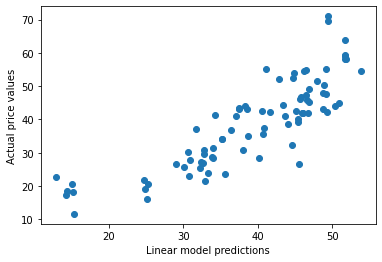

In [46]:
#Make predictions on test
lm_pred= lm_md.predict(x_test)
lm_pred #How good are these predictions?

import matplotlib.pyplot as plt
plt.scatter(lm_pred, y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [47]:
#Computing MSE (Lower the better)
MSE=np.mean((y_test-lm_pred)**2)
MSE

49.25141268453213

In [48]:
x_train2= x_train.drop(columns='distance_to_the_nearest_MRT_station')
lm_md= LinearRegression().fit(x_train2, y_train)

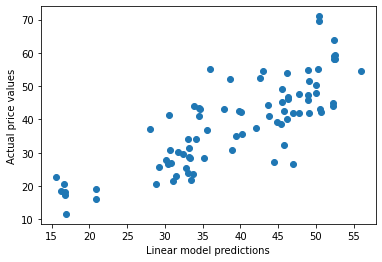

In [49]:
#Make predictions on test
x_test2=x_test.drop(columns='distance_to_the_nearest_MRT_station')
lm_pred2= lm_md.predict(x_test2)
lm_pred2 #How good are these predictions?

import matplotlib.pyplot as plt
plt.scatter(lm_pred2, y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [50]:
#Computing MSE (Lower the better)
MSE2=np.mean((y_test-lm_pred2)**2)
MSE2

59.45405986979649

In [51]:
#f. Based on parts d and e, I woudl use the first model because I got a model with 
# an MSE about 10 less than the first model! When i ran it M1=67.8 and M2=78.12

In [59]:
for x in range(0, 100):
    from sklearn.model_selection import train_test_split

    #Define the input and target variable
    x= house_price.drop(columns= 'house_price_of_unit_area', axis=1)
    y= house_price['house_price_of_unit_area']

    #Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
    
    from sklearn.linear_model import LinearRegression
    #Building Linear Model
    lm_md= LinearRegression().fit(x_train, y_train)
    
    #Make predictions on test
    lm_pred= lm_md.predict(x_test)
    lm_pred #How good are these predictions?
    lm_pred_list=[]
    lm_pred_list.append(lm_pred)

    
    #Computing MSE (Lower the better)
    MSE=np.mean((y_test-lm_pred)**2)
    MSE_list=[]
    MSE_list.append(MSE)
    
    #2nd LR Model
    x_train2= x_train.drop(columns='distance_to_the_nearest_MRT_station')
    lm_md= LinearRegression().fit(x_train2, y_train)
    
    #Make predictions on test
    x_test2=x_test.drop(columns='distance_to_the_nearest_MRT_station')
    lm_pred2= lm_md.predict(x_test2)
    lm_pred2_list=[] #How good are these predictions?
    lm_pred2_list.append(lm_pred2)
    
    
    #Computing MSE (Lower the better)
    MSE2=np.mean((y_test-lm_pred2)**2)
    MSE2_list=np.array([])
    MSE2_list=np.append(MSE2_list, [MSE2])
    
    

print(MSE2_list)
#import matplotlib.pyplot as plt
#print(*lm_pred_list)
#print(*lm_pred2_list)
#plt.plot(lm_pred_list, 'r', lm_pred2_list,'g') 
#plt.show()


[82.03423557]


In [33]:
#g. Based on my results, Model 1 was better 89% of the time. Therofre, I think 
#because it was the better the first time it ran, and then in the loop, model 1 
#would be the best to proceed with!